In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1  -  Getting used to numpy
Create a 5 x 5 identity matrix.

In [197]:
np.identity(5, dtype='int')

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

## 2  -  Linear regression with one variable

### 2.1    Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

In [198]:
df = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [199]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [200]:
x1 = df['Population']
y = df['Profit']
m = len(y)

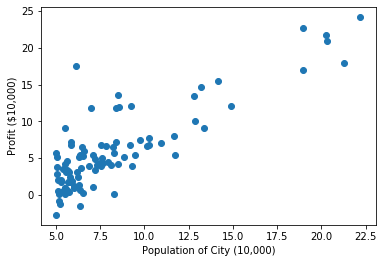

In [201]:
plt.scatter(x1, y)
plt.xlabel('Population of City (10,000)')
plt.ylabel('Profit ($10,000)')
plt.show()

### 2.2    Gradient Descent
In this part, I will fit the linear regression parameters $\theta$ to the data set using gradient descent.

#### 2.2.1    Update Equations
The objective of linear regression is to minimize the cost function.

#### 2.2.2    Implementation

In [202]:
# Note to self: Series.values returns a numpy array
X = np.hstack([np.ones([m,1]), x1.values.reshape([m,1])])
y = y.values.reshape([m,1])
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01

#### 2.2.3    Computing the cost function

In [203]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors_sq = (predictions - y)**2
    cost = 1/(2*m) * np.sum(errors_sq)
    return cost

#### 2.2.4    Gradient Descent

In [260]:
def gradient_descent(X, y, theta, iterations, alpha):
    for _ in range(iterations):
        descent = alpha * 1/m * X.transpose().dot(X.dot(theta) - y)
        theta -= descent
        print(compute_cost(X, y, theta))
    return theta

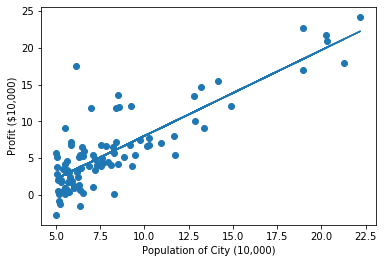

In [205]:
theta = gradient_descent(X, y, theta, iterations, alpha)

plt.scatter(x1, y)
plt.xlabel('Population of City (10,000)')
plt.ylabel('Profit ($10,000)')
plt.plot(x1, X.dot(theta))
plt.show()

## 3 - Linear regression with multiple variables

In [254]:
df2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [255]:
df2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [315]:
X2 = np.hstack([np.ones([len(df2.index),1]), df2[['Size', 'Bedrooms']].values])
y2 = df2['Price'].values.reshape([len(df2.index),1])
theta2 = np.zeros([3,1])
alpha2 = 0.3
iterations2 = 50

### 3.1 Feature Normalization

In [316]:
def feature_normalization(X):
    for i in range(1, len(X[0])):
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
    return X

### 3.2 Gradient Descent

In [317]:
def gradient_descent_multi(X, y, theta, iterations, alpha):
    history = []
    for _ in range(iterations):
        descent = alpha * 1/m * X.transpose().dot(X.dot(theta) - y)
        theta -= descent
        history.append(compute_cost(X, y, theta))
    return theta, history

In [318]:
X2_norm = feature_normalization(X2)
theta2 = gradient_descent_multi(X2_norm, y2, theta2, iterations2, alpha2)

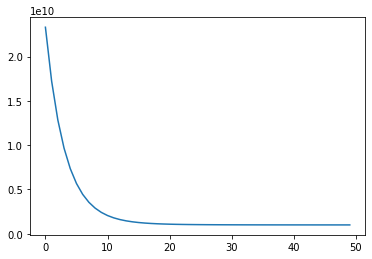

array([[340280.48573165],
       [107318.71772543],
       [ -4449.54406059]])

In [319]:
plt.plot(theta2[1])
plt.show()
theta2[0]

### 3.3 Normal Equations

In [321]:
def normal_eq(X, y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

normal_eq(X2_norm, y2)

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])